<div class="alert alert-block alert-success">
<h4><center>Harshil Patel (pmb5br@virginia.edu) DS 5001 Spring 2023</center></h4>
</div>

<hr>

<div class="alert alert-block alert-info">
<h3><center> The Sun Also Rises, by Ernest Hemingway</center></h3>
</div>

<hr>

<div class="alert alert-block alert-warning">
<h4><center>Notebook 2: Content</center></h4> 
<ul>
  <li>Examining Probability Features of term_str</li>
  <li>Entropy Computation</li>
  <li>Sentence Prediction</li>
  <li>Implementing Ngram Language Models</li>
  <li>Exploring Speculations</li>
  <li>Text Generation</li>
  <li>Analyzing Redundancy for each n-gram model</li>
  <li>Part of Speech Tagging</li>
  <li>Character Interaction Analysis</li>
  <li>Relationship between Noun and Verb</li>
</ul>
    
Tables saved - vocabprobabilityfeatures, LM1, LM2, LM3, pos
    
</div>

<hr>

### Config

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_home = "../data/output"
OHCO = ['chap_num', 'para_num', 'sent_num', 'token_num']

In [3]:
TOKENS = pd.read_csv(f"{data_home}/tokens.csv", index_col=0)
VOCAB = pd.read_csv(f"{data_home}/vocab.csv", index_col=0)

In [4]:
TOKENS.head()

,para_num,sent_num,token_num,token_str,term_str
chap_num,,,,,
1,0,0,0,Robert,robert
1,0,0,1,Cohn,cohn
1,0,0,2,was,was
1,0,0,3,once,once
1,0,0,4,middleweight,middleweight


In [5]:
VOCAB.head()

,term_str,n
term_id,,
0,the,4484
1,i,2334
2,and,2290
3,to,1590
4,a,1534


In [6]:
len(TOKENS)

70377

In [7]:
len(VOCAB)

4710

In [8]:
OHCO

['chap_num', 'para_num', 'sent_num', 'token_num']

### Extract Probabilty Features (p, s, i, and h)

In [9]:
n_tokens = VOCAB.n.sum()
n_terms = VOCAB.n.count()
VOCAB['p'] = VOCAB['n'] / n_tokens
VOCAB['s'] = 1/VOCAB['p']
VOCAB['i'] = np.log2(1/VOCAB['p'])
VOCAB['h'] = VOCAB['p'] * VOCAB['i']

In [10]:
VOCAB.sort_values('p', ascending=False).head(10)

,term_str,n,p,s,i,h
term_id,,,,,,
0,the,4484,0.063714,15.695138,3.972246,0.253088
1,i,2334,0.033164,30.152956,4.914228,0.162977
2,and,2290,0.032539,30.732314,4.941685,0.160798
3,to,1590,0.022593,44.262264,5.468005,0.123537
4,a,1534,0.021797,45.878096,5.519734,0.120313
5,you,1178,0.016738,59.742784,5.900693,0.098768
6,was,1165,0.016554,60.409442,5.916702,0.097943
7,it,1155,0.016412,60.932468,5.929139,0.097307
8,of,1125,0.015985,62.557333,5.967107,0.095386


### Compute Entropy of the model

In [11]:
H = VOCAB.h.sum()

In [12]:
H

8.796463077558032

In [13]:
smooth = VOCAB['p'].min()

In [14]:
def predict_sentence(sent_str):
    tokens = pd.DataFrame(sent_str.lower().split(), columns=['term_str'])
    tokens = tokens.merge(VOCAB, on='term_str', how='left')
    tokens.loc[tokens['p'].isna(), 'p'] = [smooth]
    p = tokens['p'].product()

    print("p('{}') = {}".format(sent_str, p))

In [15]:
predict_sentence('Robert Cohn')
predict_sentence('middleweight boxing')
predict_sentence("read papers")
predict_sentence("playing football")
predict_sentence("said to her")
predict_sentence('said to him')

p('Robert Cohn') = 5.06367743057242e-06
p('middleweight boxing') = 4.2399212935415e-09
p('read papers') = 1.3123565908580833e-07
p('playing football') = 1.211406083869e-08
p('said to her') = 1.0178739052193677e-06
p('said to him') = 1.877118110924029e-06


Firstly, we can observe that the name "Robert Cohn" has a higher probability (5.06e-6) than phrases like "middleweight boxing" (4.24e-9) or "playing football" (1.21e-8). This suggests that the character Robert Cohn plays a significant role in the novel, and his name appears frequently in the text. Additionally, we can see that the probability of the phrases "said to her" (1.02e-6) and "said to him" (1.88e-6) are both higher than the probability of phrases like "middleweight boxing" or "playing football". This suggests that dialogue between characters is an important aspect of the novel, and there may be many instances where characters are talking to each other. Finally, we can see that the probability of the phrase "read papers" (1.31e-7) is higher than the probability of phrases like "middleweight boxing" or "playing football", but lower than the probability of phrases like "said to her" or "said to him". This suggests that reading is likely a significant activity in the novel, but not as important as dialogue between characters. Overall, these language model probabilities provide some insight into the important characters, activities, and themes in "The Sun Also Rises".

In [16]:
Hmax = np.log2(n_terms)
R = 1 - (H/Hmax)
round(R, 2) * 100

28.000000000000004

Entropy, or "Shannon Entropy," is a measure of the unpredictability or uncertainty of a system. In our lecture, we covered multiple ways to understand entropy. It can be seen as a property of the probability distribution of a random variable, a measure of uncertainty about the outcome of an RV, or the degree of equiprobability. Additionally, it can represent the average minimum message length required to re-encode messages, the average number of decisions needed to produce an outcome, the size of the search space of possible values, or the degree of surprise upon obtaining a result. These different perspectives provide a comprehensive understanding of entropy and its applications in information theory, physics, and statistics. In the following section, we will explore the entropy of our models.

The entropy of the entire model is around 8.79%, which is a relatively low entropy. This means that there is a low surprise for the results.

The redundancy is a normalizing measure. The redundancy of the English language used in "The Sun Also Rises" is 28%. This is lower than the Shannon's estimate for English language as in general, which is supposed to be at around 50%.

In [17]:
import pandas as pd
import numpy as np

class NgramCounter():
    """A class to generate tables of ngram tokens and types from a list of sentences."""
    
    unk_sign = '<UNK>'
    sent_pad_signs = ['<s>','</s>']
        
    def __init__(self, sents:[], vocab:[], n:int=3):
        self.sents = sents # Expected to be normalized
        self.vocab = vocab # Can be extracted from another corpus
        self.n = n
        self.widx = [f'w{i}' for i in range(self.n)] # Used for cols and index names
        
    def generate(self):
        
        # Convert sentence list to dataframe
        self.S = pd.DataFrame(dict(sent_str=self.sents))
            
        # Pad sentences 
        pad = (self.sent_pad_signs[0] + ' ') *  (self.n - 1)
        self.I = (pad + self.S.sent_str + ' ' + self.sent_pad_signs[1])\
            .str.split(expand=True).stack().to_frame('w0')
        
        # Set index names
        self.I.index.names = ['sent_num', 'token_num']
        
        # Remove OOV terms
        self.I.loc[~self.I.w0.isin(self.vocab + self.sent_pad_signs), 'w0'] = self.unk_sign

        # Get sentence lengths (these will include pads)
        self.S['len'] = self.I.groupby('sent_num').w0.count()
                
        # Add w columns
        for i in range(1, self.n):
            self.I[f'w{i}'] = self.I[f"w{i-1}"].shift(-1)         
        
        # Generate ngrams
        self.NG = []
        for i in range(self.n):
            self.NG.append(self.I.iloc[:, :i+1].copy())

        # Remove spurious rows
        self.NG[i] = self.NG[i].dropna()
                                
        # Generate raw ngram counts and MLEs
        self.LM = []
        for i in range(self.n):
            self.LM.append(self.NG[i].value_counts().to_frame('n'))
            self.LM[i]['mle'] = self.LM[i].n / self.LM[i].n.sum()
            self.LM[i] = self.LM[i].sort_index()

        # Hack to remove single value tuple from unigram table ...
        self.LM[0].index = [i[0] for i in self.LM[0].index]
        self.LM[0].index.name = 'w0'
                
        
class NgramLanguageModel():
    """A class to create ngram language models."""
    
    # Set the Lidstone Smoothing value; LaPlace = 1
    k:float = .5
    
    def __init__(self, ngc:NgramCounter):
        self.S = ngc.S
        self.LM = ngc.LM
        self.NG = ngc.NG
        self.n = ngc.n
        self.widx = ngc.widx

    def apply_smoothing(self):
        """Applies simple smoothing to ngram type counts to estimate the models."""
        
        # Z1 and Z2 will hold info about unseen ngrams
        self.Z1 = [None for _ in range(self.n)] # Unseen N grams, but seen N-1 grams
        self.Z2 = [None for _ in range(self.n)] # Unseen N-1 grams too
        
        # The base vocab size (same as number of unigram types)
        V = len(self.LM[0]) # Inlcides <s> and </s>
        
        # The number of ngram types
        B = [V**(i+1) for i in range(self.n)]

        # Handle unigram case (no need for smoothing)
        self.LM[0]['p'] = self.LM[0].n / self.LM[0].n.sum()
        self.LM[0]['log_p'] = np.log2(self.LM[0].p)

        # Handle higher order ngrams
        for i in range(1, self.n):     
            
            # MLE
            self.LM[i]['mle2'] = self.LM[i].n / self.LM[i-1].n

            # Emplopy smoothing formula
            self.LM[i]['p'] = (self.LM[i].n + self.k) / (self.LM[i-1].n + B[i-1] * self.k)
            self.LM[i]['log_p'] = np.log2(self.LM[i].p)

            # Unseen N grams, but seen N-1 grams
            self.Z1[i] = np.log2(self.k / (self.LM[i-1].n + B[i-1] * self.k))

            # Unsess N-1 grams too
            self.Z2[i] = np.log2(self.k / B[i-1] * self.k)
                
            # Tidy up the index
            self.LM[i].sort_index(inplace=True)
        
    def predict(self, test:NgramCounter):
        """Predicts test sentences with estimated models."""
        self.T = test
        for i in range(self.n):
            ng = i + 1
            if i == 0:
                self.T.S[f'ng_{ng}_ll'] = self.T.NG[0]\
                    .join(self.LM[0].log_p, on=self.widx[:ng])\
                    .groupby('sent_num').log_p.sum()
            else:
                self.T.S[f'ng_{ng}_ll'] = self.T.NG[i]\
                    .join(self.LM[i].log_p, on=self.widx[:ng])\
                    .fillna(self.Z1[i]).fillna(self.Z2[i])\
                    .groupby('sent_num').log_p.sum()
                
            self.T.S[f'pp{ng}'] = 2**( -self.T.S[f'ng_{ng}_ll'] / self.T.S['len'])
            

    def generate_text(self, n_sents=20):
        """Generate texts using Shannon Game method."""
        
        LM = self.LM # For convenience
        i = self.n - 1
    
        # Start with beginning sentence marker
        words = ['<s>' for _ in range(i)]

        # Sentence counter
        sent_count = 0

        # Generate sentences until we've reached our limit
        while sent_count < n_sents:

            # Get ngram context
            ng = tuple(words[-i:])

            # Get next word
            words.append(LM[i].loc[ng].sample(weights='mle').index.values[0])

            # Terminate when end-of-sentence marker found
            if words[-1] == '</s>':
                sent_count += 1                        
                if sent_count < n_sents:
                    words.append('<s>')

        # Create text from words
        text = ' '.join(words)

        sents = pd.DataFrame(dict(sent_str=text.split('<s> <s>')))
        sents['len'] = sents.sent_str.str.len()
        sents = sents[sents.len > 0]
        sents.sent_str = sents.sent_str.str.replace('<s> ', '')
        sents.sent_str = sents.sent_str.str.replace(' </s>', '')
        sents.sent_str = sents.sent_str.str.strip()
        sents.sent_str = sents.sent_str.str.replace(r" s ", "'s ", regex=True)
        
        _ = [print(f"{str(x+1).zfill(2)}. {sent}.\n".upper()) for x, sent in enumerate(sents.sent_str)]

        self.generated_sents = sents

In [18]:
TOKENS.head()

,para_num,sent_num,token_num,token_str,term_str
chap_num,,,,,
1,0,0,0,Robert,robert
1,0,0,1,Cohn,cohn
1,0,0,2,was,was
1,0,0,3,once,once
1,0,0,4,middleweight,middleweight


In [19]:
import pandas as pd
import numpy as np

class TextImporter():
    """
    A text importing object designed for use with a single Gutenberg-type text files. Generates TOKENS and VOCAB dataframes.
    
    Sample parameter values:
    ohco_pats = [
        ('chapter', r"^\s*(chapter|letter)\s+(\d+)")    
    ]
    clip_pats = [r'START OF GUTENBERG PROJECT', r'^\s*THE END']
    """

    src_imported:bool = False       
    src_clipped:bool = False
    src_col_suffix:str ='_str'
    join_pat:str = r'\n'
        
    # We assume all OHCOs have sentences and tokens
    ohco_pats:[tuple] = [
        ('para', r"\n\n", 'd'),
        ('sent', r"[.?!;:]+", 'd'),
        ('token', r"[\s',-]+", 'd')
    ]
        
    _ohco_type:{} = {
        'd': '_num',
        'm': '_id'
    }
        
    def __init__(self, src_file:str, ohco_pats:[], clip_pats:[]):
        # TODO: Generalize this to work with strings, too
        self.src_file = src_file            
        self.clip_pats = clip_pats # TODO: Validate
        self.ohco_pats = ohco_pats + self.ohco_pats # TODO: Validate
        self.OHCO = [item[0]+self._ohco_type[item[2]] for item in self.ohco_pats]
        self.ohco_names = [item[0] for item in self.ohco_pats]
        
    def import_source(self, strip:bool=True, char_encoding:str="utf-8-sig"):
        """Convert a raw text file into a dataframe of lines"""
        print("Importing ", self.src_file)
        text_lines = open(self.src_file,'r', encoding=char_encoding).readlines()
        self.LINES = pd.DataFrame({'line_str':text_lines})
        self.LINES.index.name = 'line_id'
        if strip:
            self.LINES.line_str = self.LINES.line_str.str.strip()
        self.src_imported = True
        print("Clipping text")
        self._clip_lines()
        return self        

    def _clip_lines(self):
        """Remove cruft lines from beginning and/or end of file"""
        start_pat = self.clip_pats[0]
        end_pat = self.clip_pats[1]
        start = self.LINES.line_str.str.contains(start_pat, regex=True)
        end = self.LINES.line_str.str.contains(end_pat, regex=True)
        start_line_num = self.LINES.loc[start].index[0]
        end_line_num = self.LINES.loc[end].index[0]
        self.LINES = self.LINES.loc[start_line_num + 1 : end_line_num - 2]
        self.src_clipped == True
        
    def parse_tokens(self):
        """Convert lines to tokens with arbitrary OHCO"""
        if self.src_imported:
            self.TOKENS = self.LINES.copy()
            for i, level in enumerate(self.OHCO):
                print(f"Parsing OHCO level {i} {level}", end=' ')
                parse_type = self.ohco_pats[i][2]
                if parse_type == 'd':
                    self.TOKENS = self._split_by_delimitter(self.TOKENS, i)
                elif parse_type == 'm':
                    self.TOKENS = self._group_by_milestone(self.TOKENS, i)
                else:
                     print(f"Invalid parse option: {parse_type}.")
            self.TOKENS['term_str'] = self.TOKENS.token_str.str.replace(r'[\W_]+', '', regex=True).str.lower()
            return self
        else:
            raise("Source not imported. Please run .import_source()")

    def _group_by_milestone(self, df, ohco_level):
        """Group and chunk text by milestone, such as chapter headers"""
        
        # DEFINITIONS

        # The name of the div (content object level) to be created
        div_name = self.ohco_pats[ohco_level][0]

        # The milestone pattern to used to infer the div
        div_pat = self.ohco_pats[ohco_level][1]
        
        # Notify 
        print(f"by milestone {div_pat}")
        
        # The parent div (content object level)
        if ohco_level - 1 < 0:
            src_div_name = 'line' # If we are working with the raw table of lines
        else:
            src_div_name = self.ohco_names[ohco_level - 1] 
            
        # The name of the column to apply the pattern
        src_col = f"{src_div_name}{self.src_col_suffix}"
        
        # The new column
        dst_col = f'{div_name}{self.src_col_suffix}'

        # The suffix of the id for the new table
        id_suffix = self._ohco_type['m']
        
        # ACTIONS

        # Identify lines with milestone markers
        div_lines = df[src_col].str.contains(div_pat, regex=True, case=False) # May want to parametize case
        
        # Add a new column with the ids for the milestones
        df.loc[div_lines, div_name] = [i+1 for i in range(df.loc[div_lines].shape[0])]
        
        # Forward fill to include members of the div
        df[div_name] = df[div_name].ffill()
        
        # Remove everything before first div
        df = df.loc[~df[div_name].isna()] 
        
        # Remove lines milestone markers
        df = df.loc[~div_lines] 
        
        # Cast values to ints (from floats)
        df[div_name] = df[div_name].astype('int')
        
        # Make a big doc string from the named lines
        df = df.groupby(self.ohco_names[:ohco_level+1])[src_col].apply(lambda x: '\n'.join(x)).to_frame(dst_col)
        
        # Strip the new doc string
        df[dst_col] = df[dst_col].str.strip()
                
        # Rename index
        df.index.name = f"{div_name}{id_suffix}"
        
        # Return new dataframe
        return df

    def _split_by_delimitter(self, df, ohco_level):
        """Split and chunk text by a delimmitter, for paragraphs, sentences, and tokens"""
        
        # DEFINITIONS

        # The name of the div (content object level) to be created
        div_name = self.ohco_pats[ohco_level][0]

        # The milestone pattern to used to infer the div
        div_pat = self.ohco_pats[ohco_level][1]
        
        # Notify
        print(f"by delimitter {div_pat}")
        
        # The suffix of the id for the new table
        id_suffix = self._ohco_type['d']

        # The parent div (content object level) -- we assume this is not the first parsing
        src_div_name = self.ohco_names[ohco_level-1]
        
        # The name of the column to apply the pattern
        src_col = f"{src_div_name}{self.src_col_suffix}"
        
        # Tne new column
        dst_col = f'{div_name}{self.src_col_suffix}'
        
        # The new index
        dst_index = df.index.names + [div_name + id_suffix]
        
        # ACTIONS
        
        # Split source column by pattern and stack into new table
        df = df[src_col].str.split(div_pat, expand=True).stack().to_frame(dst_col) #.copy()
        
        # Name index
        df.index.names = dst_index
        
        # Remove join content (e.g. new lines)
        df[dst_col] = df[dst_col].str.replace(self.join_pat, ' ', regex=True)
        
        # Remove empty lines
        df = df[~df[dst_col].str.contains(r'^\s*$', regex=True)]
        
        # Return
        return df

    def extract_vocab(self):
        """This should also be done at the corpus level."""
        self.VOCAB = self.TOKENS.term_str.value_counts().to_frame('n')
        self.VOCAB.index.name = 'term_str'
        self.VOCAB['n_chars'] = self.VOCAB.index.str.len()
        self.VOCAB['p'] = self.VOCAB['n'] / self.VOCAB['n'].sum()
        self.VOCAB['s'] = 1 / self.VOCAB['p']
        self.VOCAB['i'] = np.log2(self.VOCAB['s']) # Same as negative log probability (i.e. log likelihood)
        self.VOCAB['h'] = self.VOCAB['p'] * self.VOCAB['i']
        self.H = self.VOCAB['h'].sum()
        return self

    def gather_tokens(self, level=0, collapse=False):
        """Gather tokens into strings for arbitrary OHCO level."""
        max_level = len(self.OHCO) - 2 # Can't gather tokens at the token level :)
        if level > max_level:
            print(f"Level {level} too high. Try between 0 and {max_level}")
        else:
            level_name = self.OHCO[level].split('_')[0] # Added splitter
            idx = self.TOKENS.index.names[:level+1]
            return self.TOKENS.groupby(idx).term_str.apply(lambda x: x.str.cat(sep=' '))\
                .to_frame(f'{level_name}_str')

In [20]:
ohco_pats = [
    ('chap', r"CHAPTER$", 'm')
]
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT",
    r"\*\*\*\s*END OF (?:THE|THIS) PROJECT"
]

In [21]:
src_file_path = f"../data/pg67138.txt"

In [22]:
franky = TextImporter(src_file_path, ohco_pats=ohco_pats, clip_pats=clip_pats)

In [23]:
franky.import_source().parse_tokens().extract_vocab();

Importing  ../data/pg67138.txt
Clipping text
Parsing OHCO level 0 chap_id by milestone CHAPTER$
Parsing OHCO level 1 para_num by delimitter \n\n
Parsing OHCO level 2 sent_num by delimitter [.?!;:]+
Parsing OHCO level 3 token_num by delimitter [\s',-]+


In [24]:
franky.TOKENS

token_str term_str
chap_id para_num sent_num token_num                   
1       0        0        0                 1        1
        1        0        1            Robert   robert
                          2              Cohn     cohn
                          3               was      was
                          4              once     once
...                                       ...      ...
19      265      1        5             think    think
                          6                so       so
                 2        0                 ”         
        266      0        0               THE      the
                          1               END      end

[71636 rows x 2 columns]

In [25]:
franky.VOCAB

,n,n_chars,p,s,i,h
term_str,,,,,,
the,4482,3,0.062566,15.983043,3.998470,0.250170
,3334,0,0.046541,21.486503,4.425359,0.205960
and,2287,3,0.031925,31.323131,4.969157,0.158642
i,1999,1,0.027905,35.835918,5.163334,0.144083
to,1590,2,0.022196,45.054088,5.493586,0.121933
...,...,...,...,...,...,...
consider,1,8,0.000014,71636.000000,16.128397,0.000225
supplies,1,8,0.000014,71636.000000,16.128397,0.000225
correspondents,1,14,0.000014,71636.000000,16.128397,0.000225


In [26]:
csv_file = f"../data/output/vocabprobabilityfeatures.csv"
franky.VOCAB.to_csv(csv_file)

In [27]:
franky.OHCO

['chap_id', 'para_num', 'sent_num', 'token_num']

In [28]:
sents = franky.gather_tokens(2).sent_str.to_list()

In [29]:
sents[:10]

['1',
 'robert cohn was once middleweight boxing champion of princeton',
 'do not think that i am very much impressed by that as a boxing title but it meant a lot to cohn',
 'he cared nothing for boxing in fact he disliked it but he learned it painfully and thoroughly to counteract the feeling of inferiority and shyness he had felt on being treated as a jew at princeton',
 'there was a certain inner comfort in knowing he could knock down anybody who was snooty to him although being very shy and a thoroughly nice boy he never fought except in the gym',
 'he was spider kellys star pupil',
 'spider kelly taught all his young gentlemen to box like featherweights no matter whether they weighed one hundred and five or two hundred and five pounds',
 'but it seemed to fit cohn',
 'he was really very fast',
 'he was so good that spider promptly overmatched him and got his nose permanently flattened']

In [30]:
vocab = franky.VOCAB.index.to_list()

In [31]:
vocab[:10]

['the', '', 'and', 'i', 'to', 'a', 'was', 'of', 'you', 'in']

In [32]:
train = NgramCounter(sents, vocab)

In [33]:
train.generate()

In [34]:
train.LM[0]

,n,mle
w0,,
1,1,0.00001
10,1,0.00001
11,1,0.00001
118,1,0.00001
12,1,0.00001
...,...,...
zinc,3,0.00003
zizi,7,0.00007
zonda,2,0.00002


In [35]:
train.LM[1]

n      mle
w0        w1              
1         </s>  1  0.00001
10        </s>  1  0.00001
11        </s>  1  0.00001
118       of    1  0.00001
12        </s>  1  0.00001
...            ..      ...
zizi      the   1  0.00001
          you   1  0.00001
zonda     </s>  2  0.00002
à         leau  1  0.00001
æsthetics of    1  0.00001

[29415 rows x 2 columns]

In [36]:
train.LM[2]

n      mle
w0        w1   w2               
1         </s> <s>    1  0.00001
10        </s> <s>    1  0.00001
11        </s> <s>    1  0.00001
118       of   the    1  0.00001
12        </s> <s>    1  0.00001
...                  ..      ...
zizi      the  greek  1  0.00001
          you  know   1  0.00001
zonda     </s> <s>    2  0.00002
à         leau </s>   1  0.00001
æsthetics of   the    1  0.00001

[53069 rows x 2 columns]

In [37]:
train.LM[1].query("w1 == 'paris'")

,,n,mle
w0,w1,,
<s>,paris,2,0.000020
enjoy,paris,1,0.000010
find,paris,1,0.000010
for,paris,1,0.000010
from,paris,2,0.000020
hates,paris,1,0.000010
in,paris,10,0.000101
leave,paris,2,0.000020
like,paris,5,0.000050


In [38]:
csv_file = f"../data/output/LM1.csv"
train.LM[0].to_csv(csv_file)

In [39]:
csv_file = f"../data/output/LM2.csv"
train.LM[1].to_csv(csv_file)

In [40]:
csv_file = f"../data/output/LM3.csv"
train.LM[2].to_csv(csv_file)

Above is the list of words that precede the word "paris", excluding stop words.

Words like enjoy, find, hates, leave, like, love preceeded the word "paris" in the novel.

In [41]:
model = NgramLanguageModel(train)
model.apply_smoothing()

In [42]:
test_sents = """
We passed through a town and stopped.
We walked to the station.
I knelt and started to pray.
She wanted to get out of town.
""".split('\n')[1:-1]

Listing above sentences in the ascending order of bigram perpexity according to the language model generated from the text.

In [43]:
test_sents = [s.lower() for s in test_sents]

In [44]:
test = NgramCounter(test_sents, vocab)
test.generate()

In [45]:
model.predict(test)

In [46]:
model.T.S

,sent_str,len,ng_1_ll,pp1,ng_2_ll,pp2,ng_3_ll,pp3
0,we passed through a town and stopped.,10,-57.921133,55.411492,-80.144367,258.574594,-214.952702,2.956113e+06
1,we walked to the station.,8,-36.113228,22.850495,-57.767731,149.185800,-169.671066,2.423874e+06
2,i knelt and started to pray.,9,-50.071504,47.291218,-70.989348,236.829561,-192.108516,2.664421e+06
3,she wanted to get out of town.,10,-55.787948,47.795232,-85.204345,367.203115,-176.201424,2.014612e+05


In [47]:
model.T.S.sort_values('pp2').sent_str

1                we walked to the station.
2             i knelt and started to pray.
0    we passed through a town and stopped.
3           she wanted to get out of town.
Name: sent_str, dtype: object

Speculation about gender and their spatial movements in novel.

* `['he','she']` to select the indices.
* `['came','went']` to select the columns.

In [48]:
BGX = model.LM[1].n.unstack()

In [49]:
print(BGX.loc[['he','she'],['came','went']])

w1   came  went
w0             
he   17.0  12.0
she   5.0   5.0


Men moves more than women. There are more male characters than female.

### Generate a text using the generate_text function.

In [50]:
model.generate_text()

01. IT IS ON ME.

02. I WAS RUBBING DOWN WHEN I TELL HIM HE BOUNDED DOWN.

03. HE SAID IT WOULD BE RIGHT BACK.

04. YES.

05. VIENNA SAID BILL.

06. THE ROAD AND WE CAN PLAY SOME BRIDGE THERE AND JO.

07. .

08. ALL MY LIFE AND NO ONE ELSE DID EITHER EXCEPT THE HARD EYED PEOPLE AT THE DANCING KEPT UP THE BAR AND HAD BREAKFAST IN A LETTER AND SEND FOR A MINUTE BEFORE THAT THE ONLY THING TOUCHES THOSE BOILS IS A FEMALE ENGLISH WANTED TO POP OUT AND ILL SEND HIM WITH THE BOTTLE AND WINKED AT US APOLOGETICALLY.

09. IM THIRTY FOUR AS A MATTER OF TWO MEN WERE GOING TO WORK TO DO NOW SOMETIMES.

10. ARENT THEY LOVELY.

11. I WAS SITTING OVER AT THE BOTTLES A TWIRL.

12. NO.

13. .

14. THE PUBLISHERS HAD PRAISED HIS NOVEL AND IT WAS A ROTTEN DREAM.

15. I DONT BELIEVE SHE WOULD GO TO FOYOTS.

16. I DIDNT MEAN ANYTHING.

17. THE THREE MATADORS WALKED OUT.

18. .

19. OH IT WAS HOT AND THE ROD CASE.

20. ANOTHER ABSINTHE.



In [51]:
model.generate_text()

01. THERE YOU GO NOW.

02. .

03. EVERYBODYS SEEN THEM.

04. THE TOES TOUCHED.

05. THE FIRST SERVICE AND PILGRIMS WITH THEIR NURSES BEFORE THE MOTOR BUSES WERE THE DARK STAINED RED FLANNEL OF THE BED.

06. COME ON SAID BRETT.

07. I HAD COFFEE.

08. BRETT SAID.

09. THEYRE ALL ABOUT EVERYTHING.

10. ISNT ANYWHERE ELSE.

11. SOMETIMES HE WROTE A NOVEL AND IT STARTED UP THE AVENUE BROAD AND SHINY AND ALMOST DESERTED.

12. LIFT IT UP AND TOOK ONE OF THESE BITCHES THAT RUINS CHILDREN.

13. IM SATISFIED COHN SAID HE WANTED TO TOUCH YOU TO MEET PEDRO ROMERO.

14. BILL HAD GONE INTO THE WOOD FROM SIDE TO SIDE WITH HIS CAPE AGAINST HIS CHEST BLACK AND BIG STOMACH MUSCLES BULGING UNDER THE TABLE LOOKED UP VERY BRIGHT EYED AND TRYING TO CATCH WITH A CROWD OF PEOPLE AND YOU MAKE ME WELCOME IN CASE I SHOULD LIKE TO GO MIKE SAID.

15. .

16. HES SUCH A DAMNED GOOD THING TOO.

17. I HAD ONLY BEEN WITH TWO WOMEN BEHIND IT DANCED THE RIAU RIAU MUSIC THE PIPES SHRILL AND THE DRUNKS.

18. HE WAS VERY B

### Redundancy for each n-gram models

In [52]:
V = len(vocab)

In [53]:
R = []
for i in range(3):
    N = V**(i+1)
    H = (train.LM[i]['mle'] * np.log2(1/train.LM[i]['mle'])).sum()
    Hmax = np.log2(N)
    R.append(int(round(1 - H/Hmax, 2) * 100))

In [54]:
R

[40, 54, 64]

The Redundancy increases from model 0 to 2.

### Part of Speech

In [55]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
import seaborn as sns
import networkx as nx

In [56]:
with open(f"../data/pg67138.txt", 'r', encoding='utf-8-sig') as file:
    epub_read = file.readlines()[88:10224]
    txt = " ".join(epub_read).replace('\n \n', '').replace('\n', '')


In [57]:
pos = nltk.pos_tag(nltk.word_tokenize(txt))
pos = np.array(pos).transpose()

In [58]:
txt[:500]

' Robert Cohn was once middleweight boxing champion of Princeton. Do not think that I am very much impressed by that as a boxing title, but it meant a lot to Cohn. He cared nothing for boxing, in fact he disliked it, but he learned it painfully and thoroughly to counteract the feeling of inferiority and shyness he had felt on being treated as a Jew at Princeton. There was a certain inner comfort in knowing he could knock down anybody who was snooty to him, although, being very shy and a thoroughl'

In [59]:
pos

array([['Robert', 'Cohn', 'was', ..., 'so', '?', '”'],
       ['NNP', 'NNP', 'VBD', ..., 'RB', '.', 'NN']], dtype='<U18')

In [60]:
df_pos = pd.DataFrame(pos)
df_pos

,0,1,2,3,4,5,6,7,8,9,...,88651,88652,88653,88654,88655,88656,88657,88658,88659,88660
0,Robert,Cohn,was,once,middleweight,boxing,champion,of,Princeton,.,...,Isn,’,t,it,pretty,to,think,so,?,”
1,NNP,NNP,VBD,RB,JJ,VBG,NN,IN,NNP,.,...,NNP,NNP,VBD,PRP,RB,TO,VB,RB,.,NN


In [61]:
df_pos_transpose = df_pos.T 

In [62]:
df_pos_transpose = df_pos_transpose.rename(columns={0: "token_str", 1: "pos"}) #renaming columns

In [63]:
alpha_pattern = re.compile(r'[a-zA-Z]')
POS = df_pos_transpose[df_pos_transpose['token_str'].apply(lambda x: alpha_pattern.search(x) is not None)]
POS

,token_str,pos
0,Robert,NNP
1,Cohn,NNP
2,was,VBD
3,once,RB
4,middleweight,JJ
...,...,...
88654,it,PRP
88655,pretty,RB
88656,to,TO
88657,think,VB


In [64]:
len(POS)

69718

In [65]:
POS['n'] = POS['token_str'].str.len()
POS

<ipython-input-65-1a35d7942996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  POS['n'] = POS['token_str'].str.len()


,token_str,pos,n
0,Robert,NNP,6
1,Cohn,NNP,4
2,was,VBD,3
3,once,RB,4
4,middleweight,JJ,12
...,...,...,...
88654,it,PRP,2
88655,pretty,RB,6
88656,to,TO,2
88657,think,VB,5


In [66]:
POS.n.describe()

count    69718.000000
mean         3.900815
std          2.039321
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         18.000000
Name: n, dtype: float64

In [67]:
POS[POS['n']==18]

,token_str,pos,n
464,self-consciousness,JJ,18


Looking at the 'n' column, we can see the average word is about 3-4 words long (specifically, 3.9). The minimum length of a word is one, which can be seen with words like "a". 25% of the words in the novel fall to be three letters long. An example of this could be "him", "her", "the", etc. About 50% of words fall to be 4 letters long. 75% of words are a length of five letters. And lastly, the maximum length of a word is 18, which is ""self-conciousness".

In [68]:
csv_file = f"../data/output/pos.csv"
POS.to_csv(csv_file)

### Looking at Most Frequent Nouns

In [69]:
nouns = pos[0][pos[1] == 'NNP']

In [70]:
nouns = pd.Series(nouns)
nouns_df = pd.DataFrame(nouns)

In [71]:
nouns_df = nouns_df.rename(columns={0: "Word"})

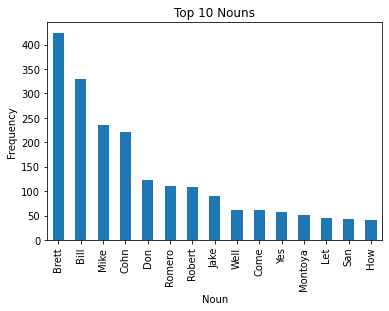

In [72]:
import matplotlib.pyplot as plt

remove_words = ['Mr.','Mrs.', "No", "’", '…' , ',', '”', '“', '*', 'Oh','Egg','New','York','West','East']
nouns = nouns[~nouns.isin(remove_words)]
top_nouns = nouns.value_counts().head(15)

top_nouns.plot(kind='bar')

plt.title('Top 10 Nouns')
plt.xlabel('Noun')
plt.ylabel('Frequency')

plt.show()


In [73]:
top_fifteen_series = nouns.value_counts().sort_values(ascending = False)[:15]
top_fifteen_df = pd.DataFrame(top_fifteen_series)

In [74]:
top_fifteen_df= top_fifteen_df.reset_index() #resetting index - need index (nouns) as a column
top_fifteen_df= top_fifteen_df.rename(columns={"index": "Noun", 0: "Count"}) #renaming columns
top_fifteen_df

,Noun,Count
0,Brett,424
1,Bill,330
2,Mike,236
3,Cohn,221
4,Don,123
5,Romero,110
6,Robert,108
7,Jake,89
8,Well,62
9,Come,62


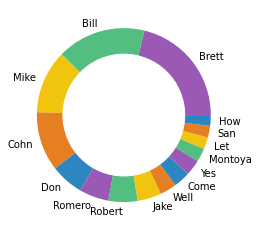

In [75]:
import matplotlib.pyplot as plt

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(top_fifteen_df['Count'], labels=top_fifteen_df['Noun'], colors=['#9B59B6','#52BE80','#F1C40F','#E67E22','#2E86C1']) #colors gotten from https://htmlcolorcodes.com/
p = plt.gcf() 
p.gca().add_artist(my_circle)
plt.show()

### Looking at Most Frequent Verbs

In [76]:
tfs_entries = nouns.value_counts().sort_values(ascending = False)[:30].index

In [77]:
lemmatizer = WordNetLemmatizer()

In [78]:
verbs = pd.DataFrame()

for i in tfs_entries:
    for j in np.argwhere([pos[0] == i])[:,1]:
        if 'VB' in pos[1,j+1]:
            df = pd.DataFrame.from_dict({'entity': [pos[0,j]], 'verb': [lemmatizer.lemmatize(pos[0,j+1], wn.VERB)]})
            verbs = pd.concat([verbs, df], ignore_index=True)

In [79]:
com_verbs = verbs.verb.value_counts().sort_values(ascending = False)
top_20_com_verbs = com_verbs[:20]
top_20_com_verbs

say      396
be       123
ask       51
have      42
do        33
come      29
go        29
look      28
smile     13
put       13
want      12
take      11
stand     10
laugh     10
call      10
start      8
turn       8
sit        7
’          7
get        6
Name: verb, dtype: int64

In [80]:
com_verbs_df = pd.DataFrame(com_verbs).reset_index()
com_verbs_df = com_verbs_df.rename(columns={"index": "Verb", 'verb': "Count"})
com_verbs_df

,Verb,Count
0,say,396
1,be,123
2,ask,51
3,have,42
4,do,33
...,...,...
118,begin,1
119,lift,1
120,stay,1
121,reach,1


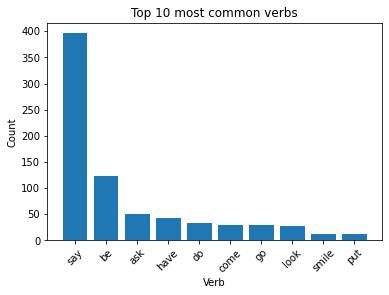

In [81]:
top_verbs = com_verbs_df.sort_values(by='Count', ascending=False).head(10)

plt.bar(top_verbs['Verb'], top_verbs['Count'])
plt.title('Top 10 most common verbs')
plt.xlabel('Verb')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Character Interactions

In [82]:
name_list = []
for i in tfs_entries:
    try:
        print(i, len(verbs.loc[(~verbs.verb.str.contains('have') &
                               ~verbs.verb.str.contains('be') & 
                               verbs.entity.str.contains(i)),:].groupby('entity').verb.value_counts()))
        name_list.append(i)
    except IndexError:
        print(i, 0)   

Brett 48
Bill 29
Mike 22
Cohn 32
Don 1
Romero 32
Robert 6
Jake 1
Well 0
Come 2
Yes 0
Montoya 15
Let 0
San 0
How 1
Paris 1
Belmonte 6
God 2
Did 0
Tell 0
Just 7
Sebastian 1
Michael 2
Harris 5
Edna 4
Do 12
Braddocks 9
Jake. 0
Hello 0
English 3


In [83]:
name_list

['Brett',
 'Bill',
 'Mike',
 'Cohn',
 'Don',
 'Romero',
 'Robert',
 'Jake',
 'Come',
 'Montoya',
 'How',
 'Paris',
 'Belmonte',
 'God',
 'Just',
 'Sebastian',
 'Michael',
 'Harris',
 'Edna',
 'Do',
 'Braddocks',
 'English']

In [84]:
name_list.remove('Come')
name_list.remove('How')
name_list.remove('Paris')
name_list.remove('God')
name_list.remove('Just')
name_list.remove('Do')
name_list.remove('Braddocks')
name_list.remove('English')

In [85]:
name_list

['Brett',
 'Bill',
 'Mike',
 'Cohn',
 'Don',
 'Romero',
 'Robert',
 'Jake',
 'Montoya',
 'Belmonte',
 'Sebastian',
 'Michael',
 'Harris',
 'Edna']

In [86]:
activities = np.zeros((14, 20))

for i, e in enumerate(name_list):
    for j, v in enumerate(top_20_com_verbs.index.values):
        activities[i, j] = len(verbs.loc[(verbs.entity.str.contains(e) & verbs.verb.str.contains(v)),:])

<AxesSubplot:>

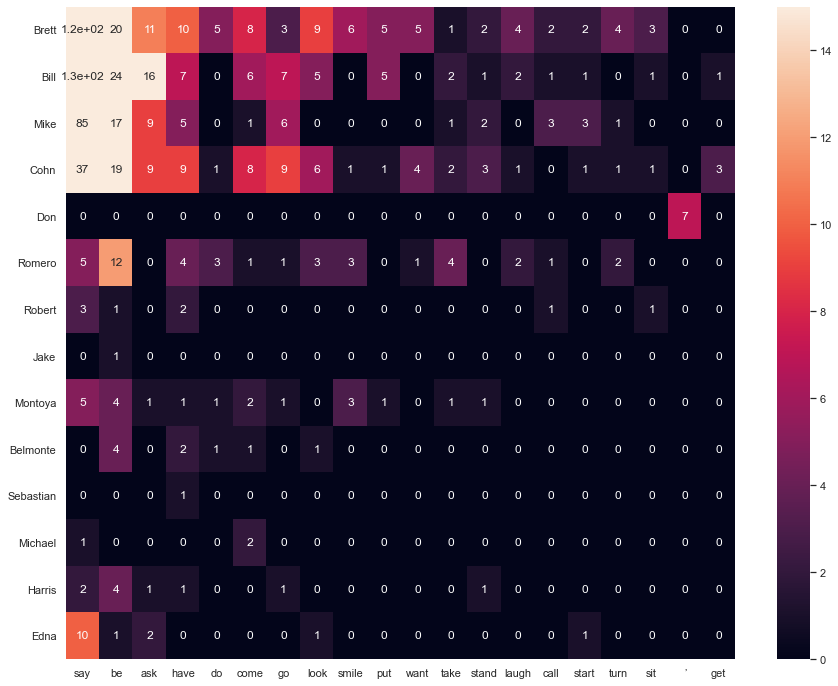

In [94]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(activities, annot=True, xticklabels=top_20_com_verbs.index.values, yticklabels=name_list, vmax=15, ax=ax)

In [88]:
interact = pd.DataFrame()

lemmatizer = WordNetLemmatizer()

for name in name_list:
    for i in np.argwhere([pos[0] == name])[:,1]:
        if 'VB' in pos[1,i+1]:
            for j in range(2, 10):
                if pos[0, i+j] in name_list:
                    df = pd.DataFrame.from_dict({'entity': [pos[0,i]], 'verb': [pos[0,i+1]],
                                                 'target':[pos[0,i+j]], 'startpos': i, 'endpos':i+j})
                    interact = pd.concat([interact, df], ignore_index=True)

In [89]:
interact = interact.loc[interact['entity'] != interact['target']]
interact

,entity,verb,target,startpos,endpos
0,Brett,stood,Cohn,6979,6985
2,Brett,was,Cohn,22896,22905
3,Brett,smiled,Bill,24566,24569
4,Brett,turned,Bill,24714,24717
5,Brett,waved,Bill,25125,25134
...,...,...,...,...,...
151,Montoya,was,Romero,57773,57782
152,Montoya,went,Mike,62350,62357
153,Belmonte,watched,Romero,76772,76774
154,Edna,asked,Cohn,67586,67595


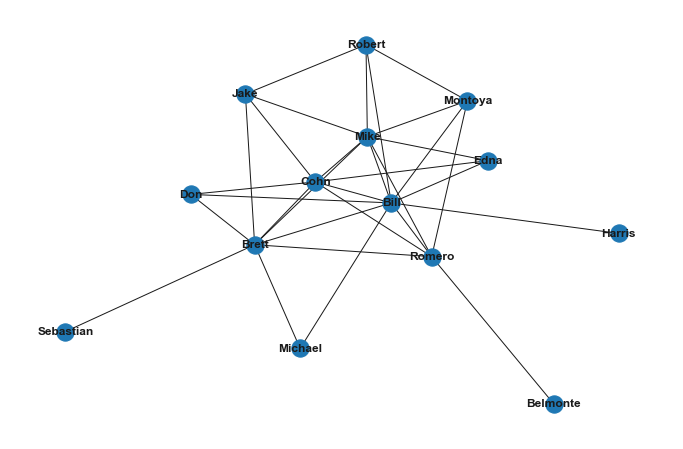

In [90]:
import seaborn as sns

sns.set()
f, ax = plt.subplots(figsize=(12, 8))

G = nx.Graph(ax=ax)
G.add_nodes_from(name_list)
G.add_edges_from(interact.loc[:, ['entity', 'target']].values)
nx.draw(G, with_labels=True, font_weight='bold')


In [91]:
all_characters = ['Jake','Barnes','Brett','Ashley','Robert',
                  'Cohn','Bill','Gorton','Mike','Campbell',
                  'Pedro','Romero','Montoya','Frances','Clyne',
                  'Belmonte','Stone']

In [92]:
interact = pd.DataFrame()

lemmatizer = WordNetLemmatizer()

for name in all_characters:
    for i in np.argwhere([pos[0] == name])[:,1]:
        if 'VB' in pos[1,i+1]:
            for j in range(2, 10):
                if pos[0, i+j] in all_characters:
                    df = pd.DataFrame.from_dict({'entity': [pos[0,i]], 'verb': [pos[0,i+1]],
                                                 'target':[pos[0,i+j]], 'startpos': i, 'endpos':i+j})
                    interact = pd.concat([interact, df], ignore_index=True)

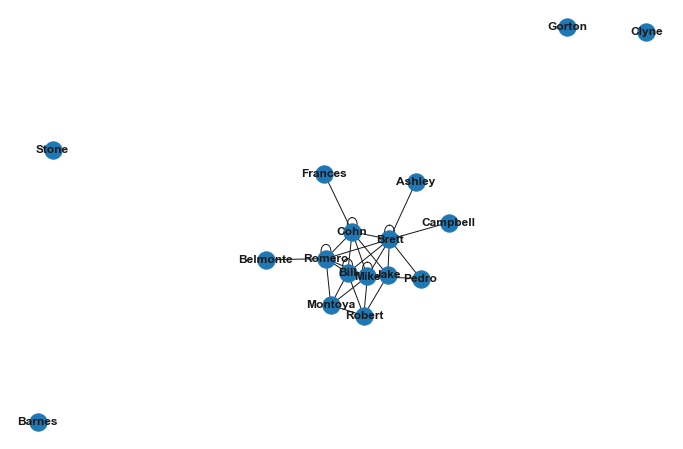

In [99]:
f, ax = plt.subplots(figsize=(12, 8))

G2 = nx.Graph(ax=ax)
G2.add_nodes_from(all_characters)
G2.add_edges_from(interact.loc[:, ['entity', 'target']].values)
nx.draw(G2, with_labels=True, font_weight='bold')